### Import Libraries

In [2]:
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt
import os

### Load Images

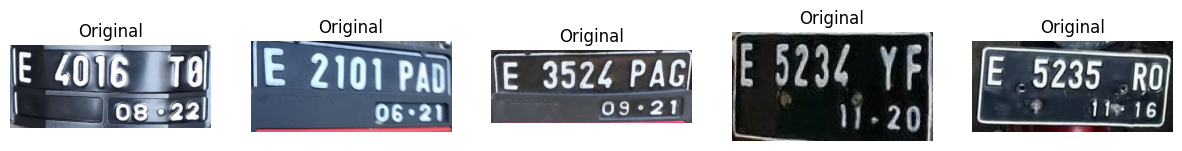

In [3]:
img_dir = './Dataset - Andi'

files = os.listdir(img_dir)
img_files = [f for f in files if f.endswith('.jpg') or f.endswith('.png')]
original_images = [cv.imread(os.path.join(img_dir, f)) for f in img_files]

fig, axes = plt.subplots(1, len(original_images), figsize=(15, 5))
for ax, image in zip(axes, original_images):
    rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    ax.imshow(rgb_image)
    ax.set_title('Original')
    ax.axis('off')
plt.show()


### Plot the Color Pixels

In [8]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i] / 255.0  # Normalize colors to 0-1 range
    R, G, B = data[i].T / 255.0  # Normalize data to 0-1 range

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

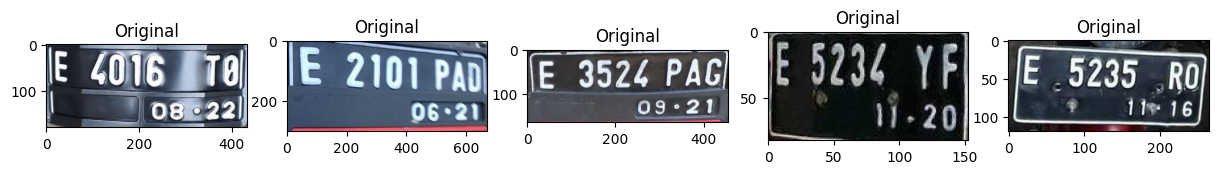

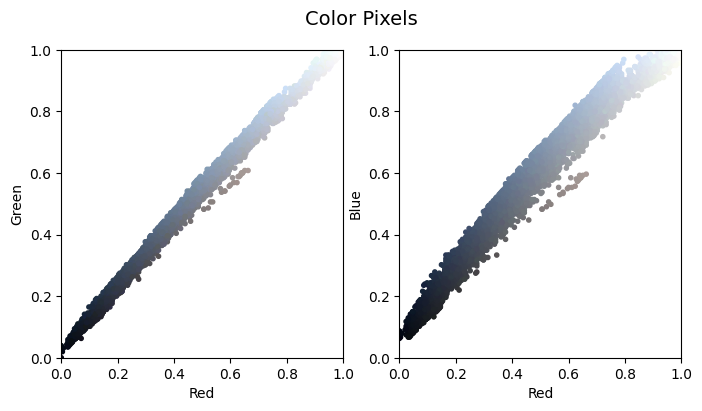

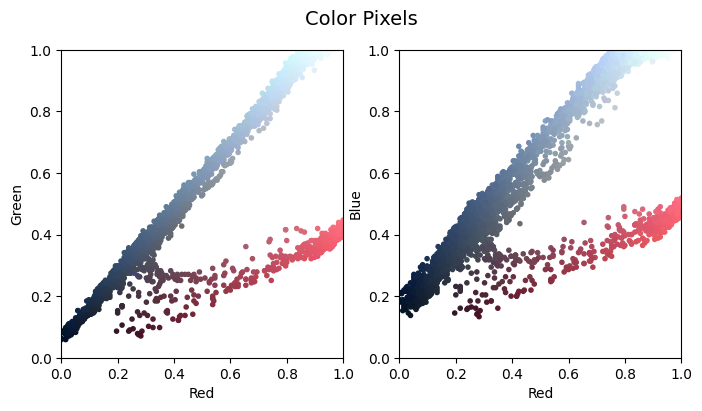

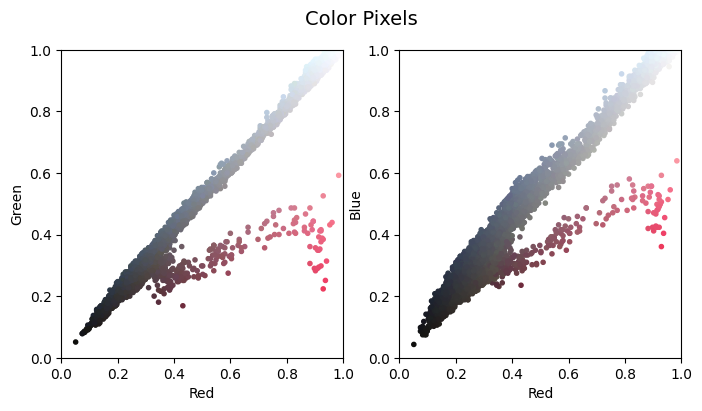

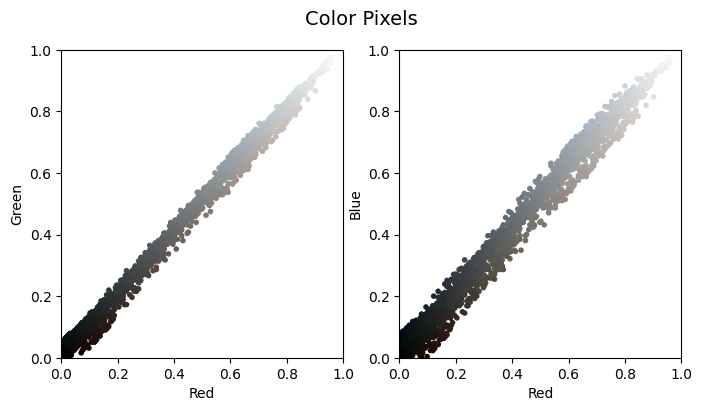

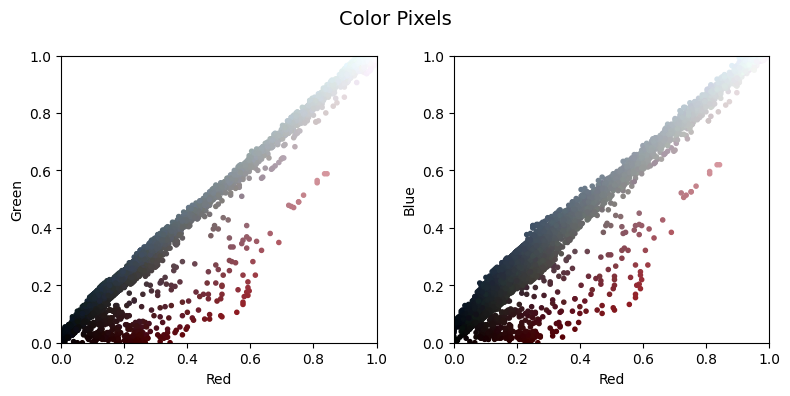

In [9]:
fig, axes = plt.subplots(1, len(original_images), figsize=(15, 5))

for i, (ax, image) in enumerate(zip(axes, original_images)):
    rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    ax.imshow(rgb_image)
    ax.set_title('Original')

    flattened_data = rgb_image.reshape(-1, 3)

    # Call plot_pixels with normalized data
    plot_pixels(flattened_data, title='Color Pixels')

plt.tight_layout()
plt.show()